## Data processing

Intended for system identification usage

See data loggers that are enabled in the launch files.

In [21]:
from data_processing import *
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
directory = os.path.abspath("sensor_data")  # Ensure absolute path
data_files = []

print(f"Current working directory: {directory}")

Current working directory: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data


In [10]:
# Collect files from the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        data_files.append(os.path.join(root, file))

# Handle empty directory case
if not data_files:
    print("No files found in the specified directory.")


# Print out data files as a list of options and wait for user input
print("Select a file to load:")
for i, file in enumerate(data_files):
    print(f"{i}: {file}")

Select a file to load:
0: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_0_immediate_data.csv
1: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_0_synchronized_data.csv
2: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_1_immediate_data.csv
3: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_1_synchronized_data.csv


## Immediate data follow vehicle 1

Unsynchronized data, interpolation needed.

In [20]:
# Load the data
selected_file = data_files[3]
print(f"Selected file: {selected_file}\n")
print(f"Loading file: {selected_file}")
data = load_data(selected_file)

# Handle the case where data loading fails
if data is not None:
    print("Data loaded successfully!")
    print(data.columns)
else:
    print("Failed to load the data. Please check the file.")

Selected file: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_1_synchronized_data.csv

Loading file: c:\Users\Emil\Documents\GitHub\Juviken-Platooning\extras\sensor_data\vehicle_1_synchronized_data.csv
Data loaded successfully!
Index(['stamp', 'pwm', 'velocity', 'steering_angle', 'distance', 'has_target',
       'target_center_offset', 'control'],
      dtype='object')


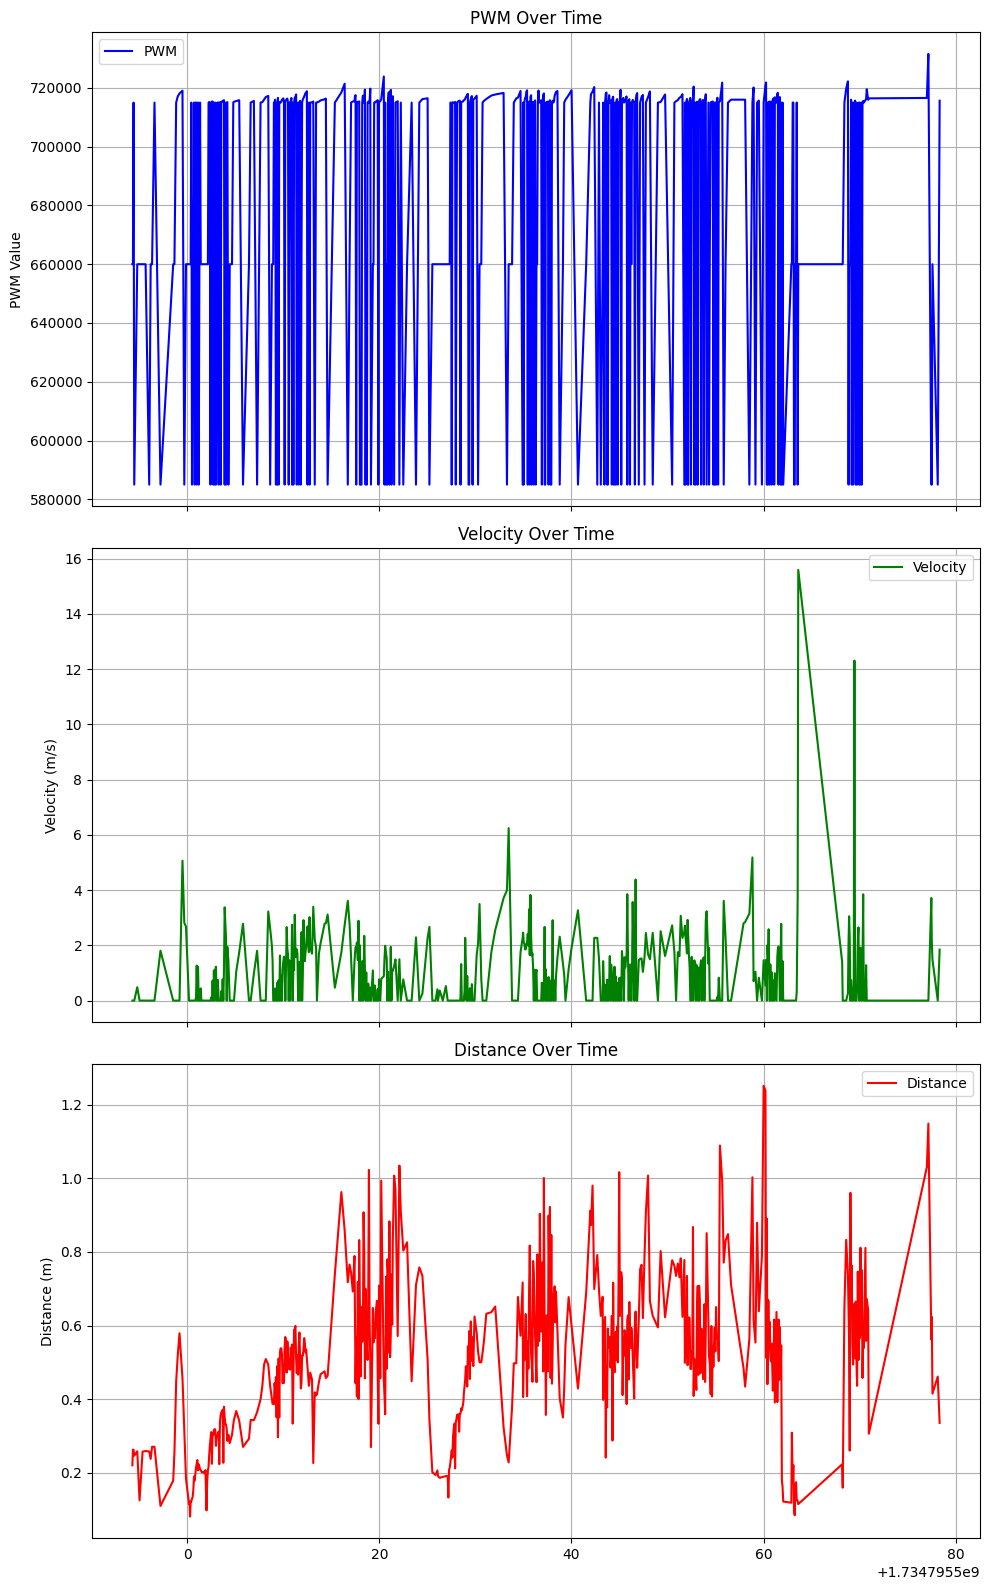

In [24]:
#Plot the data
#plot pwm, velocity, distance anad control over time using seaborn

# Set up the figure and axes for 4 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharex=True)

# Plotting pwm
axes[0].plot(data['stamp'], data['pwm'], label='PWM', color='blue')
axes[0].set_title('PWM Over Time')
axes[0].set_ylabel('PWM Value')
axes[0].legend()
axes[0].grid(True)

# Plotting velocity
axes[1].plot(data['stamp'], data['velocity'], label='Velocity', color='green')
axes[1].set_title('Velocity Over Time')
axes[1].set_ylabel('Velocity (m/s)')
axes[1].legend()
axes[1].grid(True)

# Plotting distance
axes[2].plot(data['stamp'], data['distance'], label='Distance', color='red')
axes[2].set_title('Distance Over Time')
axes[2].set_ylabel('Distance (m)')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Dynamics for lead vehicle

